In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from collections import Counter
import string
import re
import pickle

[nltk_data] Downloading package punkt to /Users/dkarsann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dkarsann/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Parsing and Processing Content

In [3]:
df_2 = pd.read_csv('../../processed_files/webis/webis.csv')

In [4]:
df_2['RAW_CONTENT_BIGRAM'] = df_2['text'].apply(lambda row: [' '.join(phrase) for phrase in nltk.bigrams(row.lower().split())])
df_2.head()

,file_number,file_type,filename,text,paraphrase,RAW_CONTENT_BIGRAM
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m. comte, comte would, would not, not advise,..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even m., m. comte, comte would, would spurn, ..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture illustrating, illustrating the, the s..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this picture, picture exemplifies, exemplifie..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, of, of course., course. and,, and, bill..."


In [5]:
print(string.punctuation)
table = str.maketrans('', '', string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [6]:
df_2_bigram_tokens = [item for sublist in df_2['RAW_CONTENT_BIGRAM'].values for item in sublist]
df_2_bigram_tokens_stripped = [w.translate(table) for w in df_2_bigram_tokens]
df_2_bigram_tokens_stripped = [phrase.strip() for phrase in df_2_bigram_tokens_stripped if len(phrase.strip().split()) == 2]
df_2_bigram_tokens_stripped[:10]

['m comte',
 'comte would',
 'would not',
 'not advise',
 'advise so',
 'so irrational',
 'irrational a',
 'a proceeding',
 'proceeding but',
 'but m']

## StopPhrases

In [7]:
counts_bigrams = Counter(df_2_bigram_tokens_stripped)
counts_bigrams.most_common(60)

[('of the', 53863),
 ('in the', 27988),
 ('to the', 18570),
 ('and the', 12396),
 ('on the', 11273),
 ('it is', 9938),
 ('to be', 9405),
 ('of a', 8908),
 ('by the', 8024),
 ('from the', 7790),
 ('for the', 7689),
 ('with the', 7181),
 ('at the', 6997),
 ('that the', 6832),
 ('in a', 6184),
 ('it was', 6000),
 ('of his', 5716),
 ('with a', 4896),
 ('he was', 4600),
 ('is a', 4505),
 ('is the', 4148),
 ('the same', 4093),
 ('as a', 3890),
 ('have been', 3862),
 ('as the', 3650),
 ('one of', 3533),
 ('all the', 3305),
 ('and a', 3231),
 ('had been', 3226),
 ('he had', 3202),
 ('was a', 3167),
 ('in his', 3101),
 ('there is', 3059),
 ('that he', 3038),
 ('the most', 2995),
 ('of this', 2964),
 ('the first', 2954),
 ('i have', 2924),
 ('for a', 2897),
 ('is not', 2851),
 ('may be', 2705),
 ('has been', 2697),
 ('into the', 2662),
 ('to a', 2640),
 ('will be', 2607),
 ('of their', 2575),
 ('they are', 2530),
 ('but the', 2530),
 ('in this', 2461),
 ('and in', 2444),
 ('was the', 2422),
 ('i

## Heaps' Law Bigrams

In [8]:
df_2.head()

,file_number,file_type,filename,text,paraphrase,RAW_CONTENT_BIGRAM
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m. comte, comte would, would not, not advise,..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even m., m. comte, comte would, would spurn, ..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture illustrating, illustrating the, the s..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this picture, picture exemplifies, exemplifie..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, of, of course., course. and,, and, bill..."


In [9]:
df_2_new = df_2.reset_index()
df_2_new = df_2_new.drop(columns=['index'])
df_2_new.head()

,file_number,file_type,filename,text,paraphrase,RAW_CONTENT_BIGRAM
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[m. comte, comte would, would not, not advise,..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even m., m. comte, comte would, would spurn, ..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[picture illustrating, illustrating the, the s..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[this picture, picture exemplifies, exemplifie..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, of, of course., course. and,, and, bill..."


In [10]:
# number of documents processed, number of unique 
num_docs_num_unique = [(0,0)]
unique = set()
for index,row in df_2_new.iterrows():
    unique.update(row['RAW_CONTENT_BIGRAM'])
    num_docs = index + 1
    num_unique = len(unique)
    num_docs_num_unique.append((num_docs, num_unique))

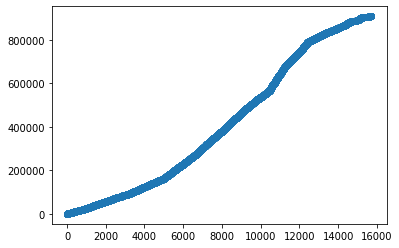

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

x, y = zip(*num_docs_num_unique)
plt.scatter(x, y)
plt.show()

In [12]:
most_to_least = sorted(counts_bigrams.items(), key=lambda item: item[1], reverse=True)
most_to_least_plot_items = []
for index, item in enumerate(most_to_least):
    most_to_least_plot_items.append((index, item[1]))

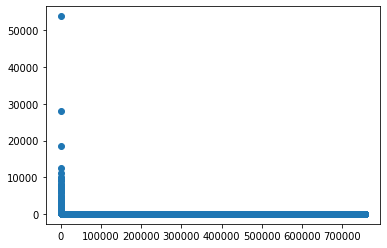

In [13]:
x, y = zip(*most_to_least_plot_items)
plt.scatter(x, y)
plt.show()

## Zipf's Law Bigrams

In [14]:
most_to_least_2 = sorted(counts_bigrams.items(), key=lambda item: item[1], reverse=True)
most_to_least_bigrams_2 = []
for index, item in enumerate(most_to_least):
    if index < 0:
        continue
    if index >= 300:
        break
    most_to_least_bigrams_2.append((index, item[1]))

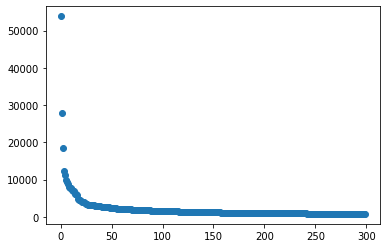

In [15]:
x2, y2 = zip(*most_to_least_bigrams_2)
plt.scatter(x2, y2)
plt.show()

## Stop Phrase lists

In [16]:
corpus_bigrams = set([i[0] for i in counts_bigrams.most_common(30)])

In [17]:
with open('../../processed_files/stopwords/webis_corpus_bigrams.pickle', 'wb') as file:
    pickle.dump(corpus_bigrams, file)